<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/PCA_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/winequality-red.csv")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
data.shape

(1599, 12)

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

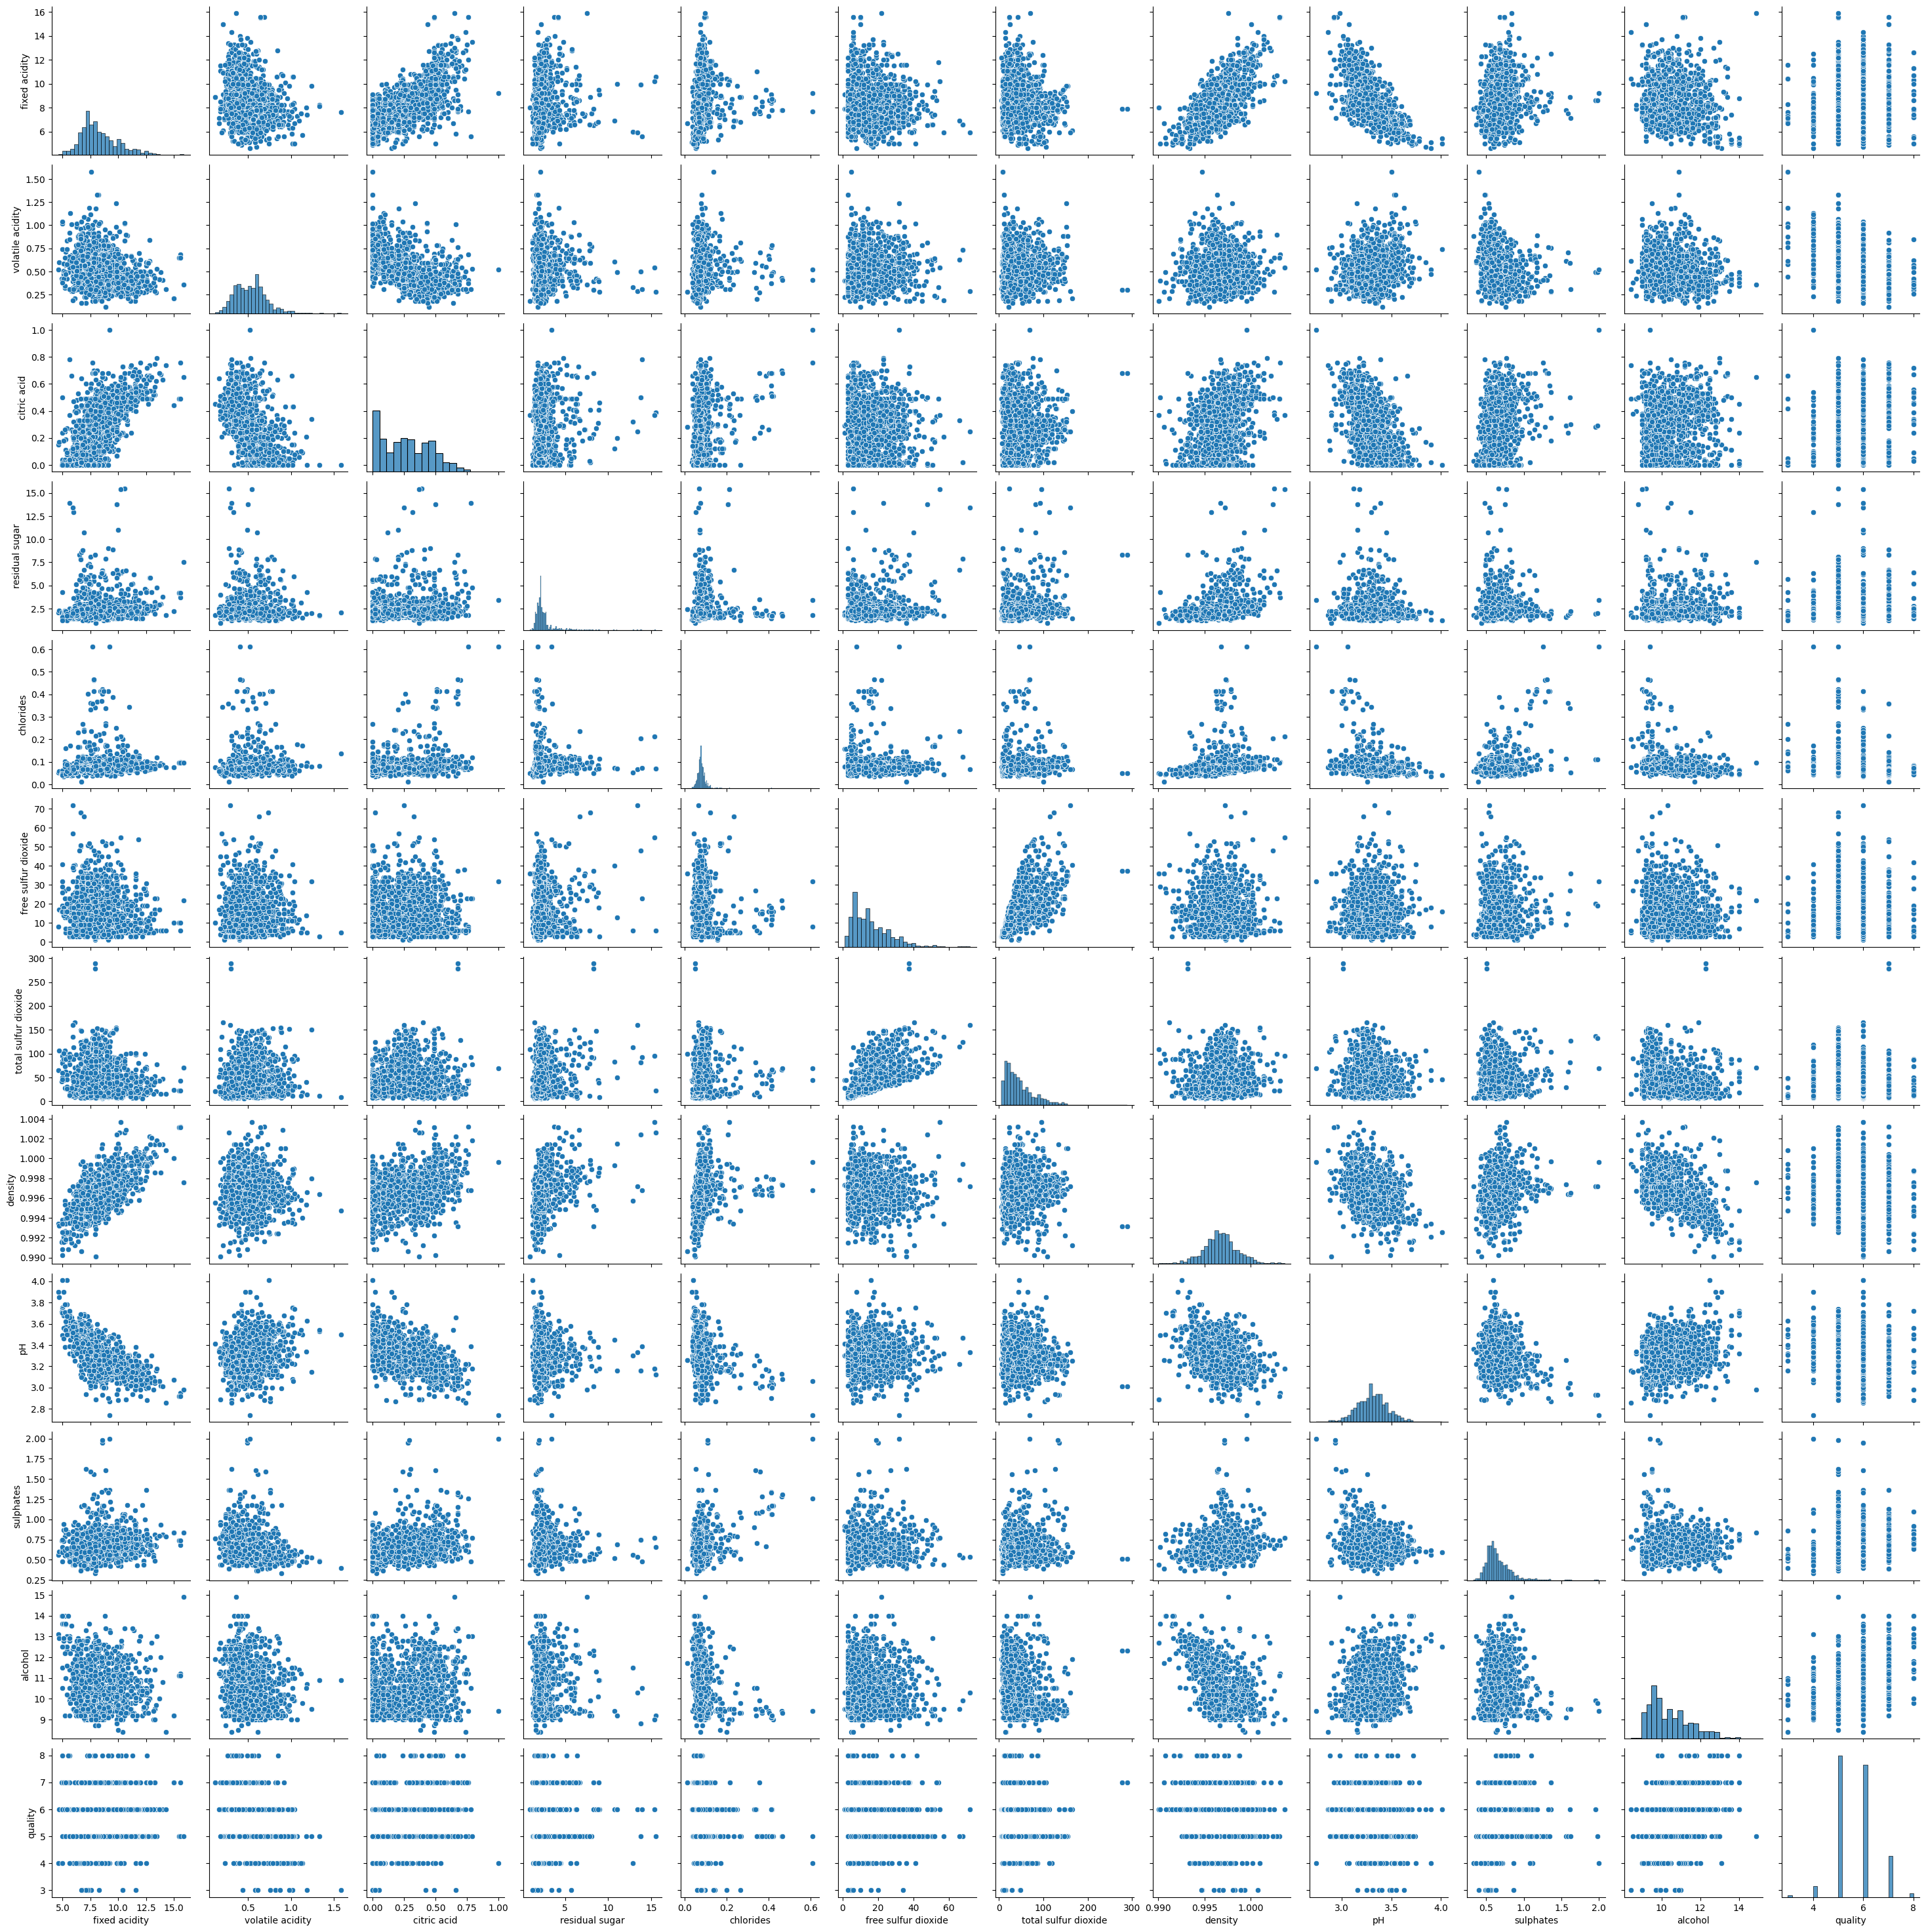

In [9]:
sns.pairplot(data)

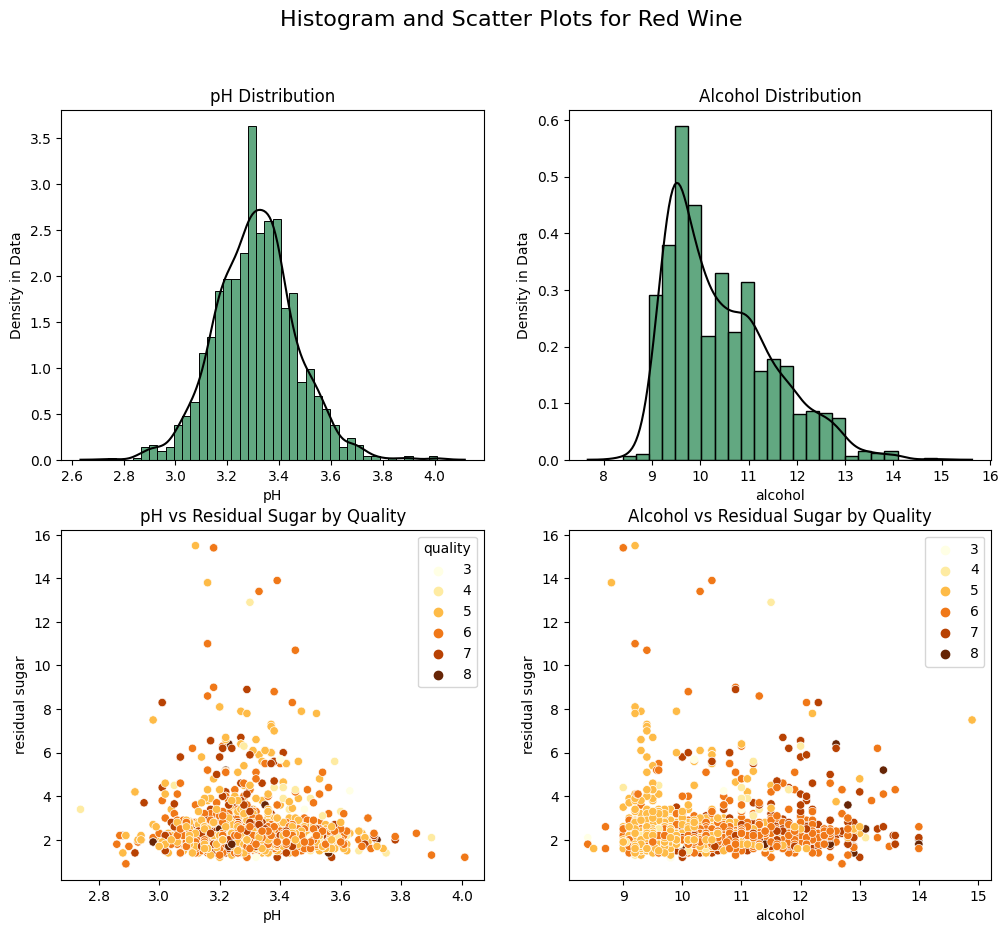

In [45]:
plt.figure(figsize=(12,10))
plt.suptitle("Histogram and Scatter Plots for Red Wine", size=16)

plt.subplot(2, 2, 1)
plt.title("pH Distribution")
sns.histplot(data, x="pH", stat="density", color="seagreen")
sns.kdeplot(data, x="pH", color="black")
plt.ylabel("Density in Data")

plt.subplot(2, 2, 2)
plt.title("Alcohol Distribution")
sns.histplot(data, x="alcohol", stat="density", color="seagreen")
sns.kdeplot(data, x="alcohol", color="black")
plt.ylabel("Density in Data")

plt.subplot(2, 2, 3)
plt.title("pH vs Residual Sugar by Quality")
sns.scatterplot(data, x="pH", y="residual sugar", hue="quality", palette="YlOrBr")

plt.subplot(2, 2, 4)
plt.title("Alcohol vs Residual Sugar by Quality")
sns.scatterplot(data, x="alcohol", y="residual sugar", hue="quality", palette="YlOrBr")
plt.legend(loc="upper right")


<ipython-input-46-da270748ecda>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = round(data.corr(), 2)
<ipython-input-46-da270748ecda>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr()))


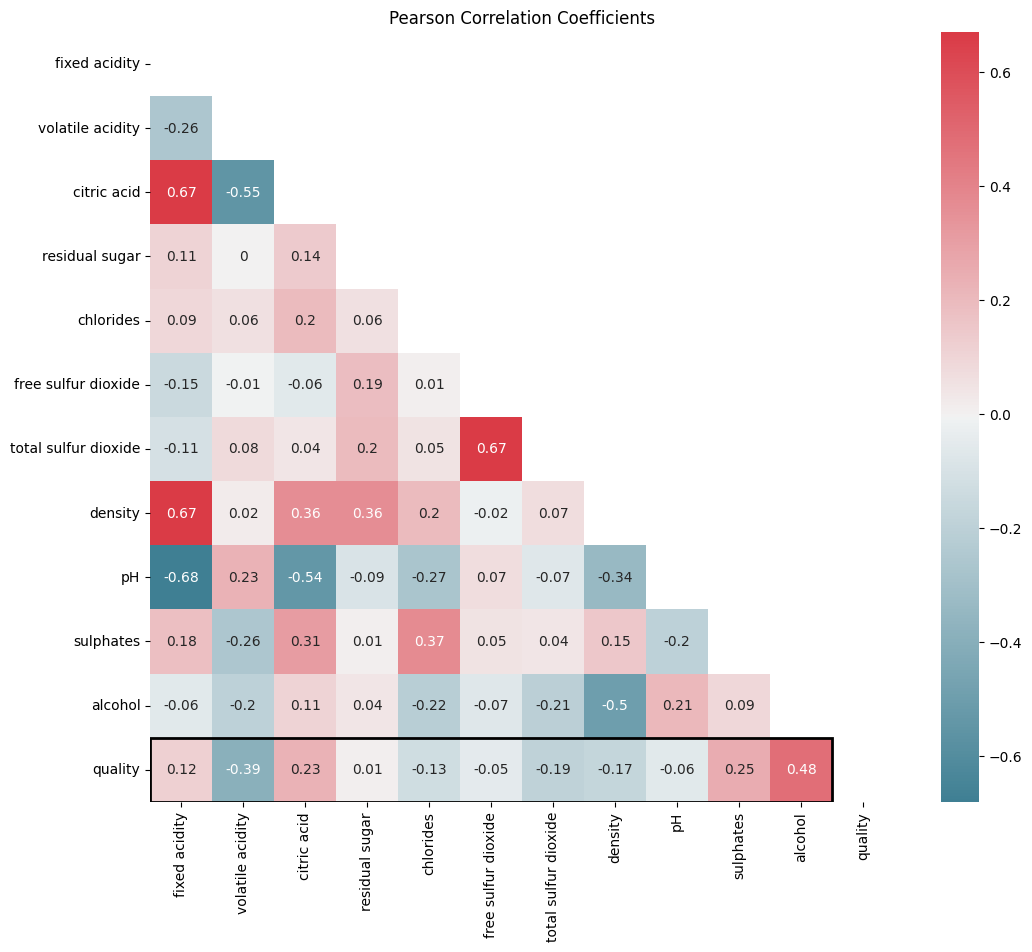

In [46]:
corr = round(data.corr(), 2)
plt.figure(figsize=(12,10))
plt.title("Pearson Correlation Coefficients")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)

rect_x = 0
rect_y = 11
rect_width = 11
rect_height = 1
rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect)
plt.show()

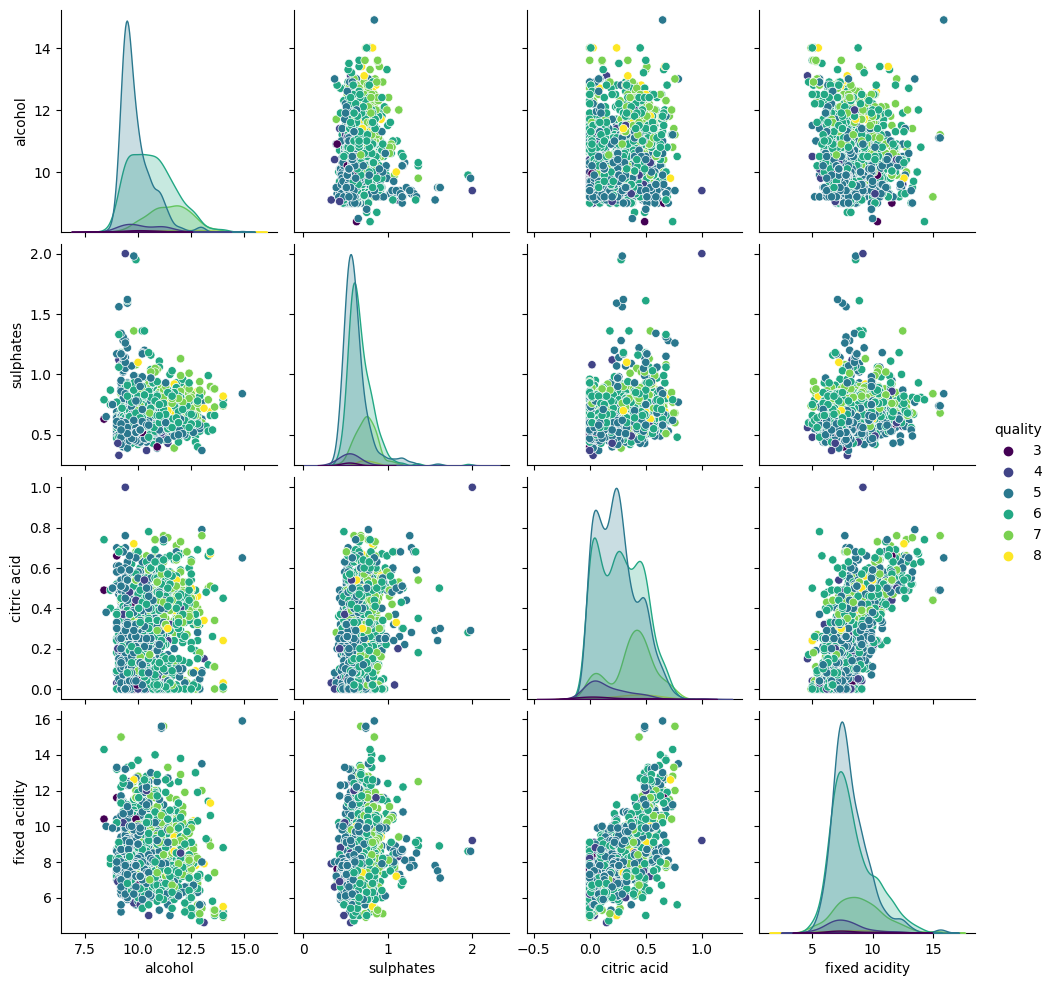

In [47]:
sns.pairplot(data, vars=["alcohol", "sulphates", "citric acid", "fixed acidity"], hue="quality", palette="viridis")

<ipython-input-48-89da566c9e3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (13,10), colormap = 'plasma')


<Axes: >

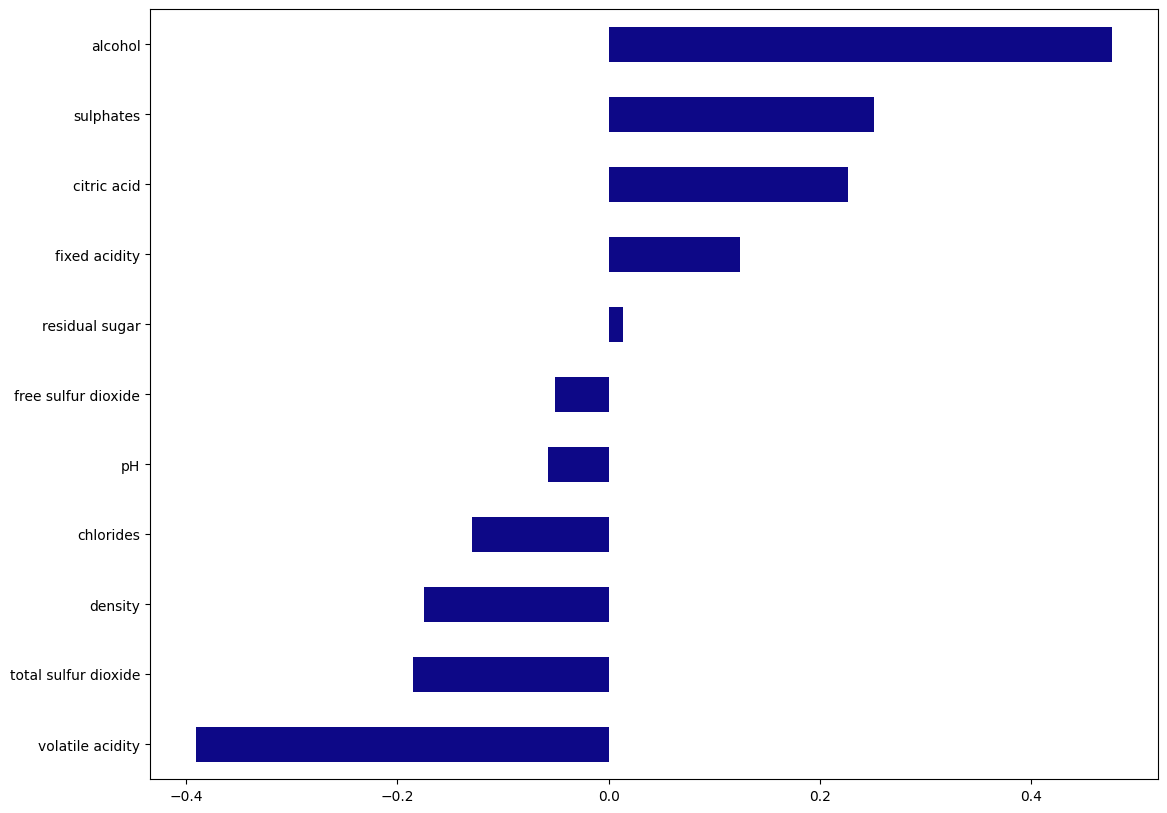

In [48]:
data.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (13,10), colormap = 'plasma')

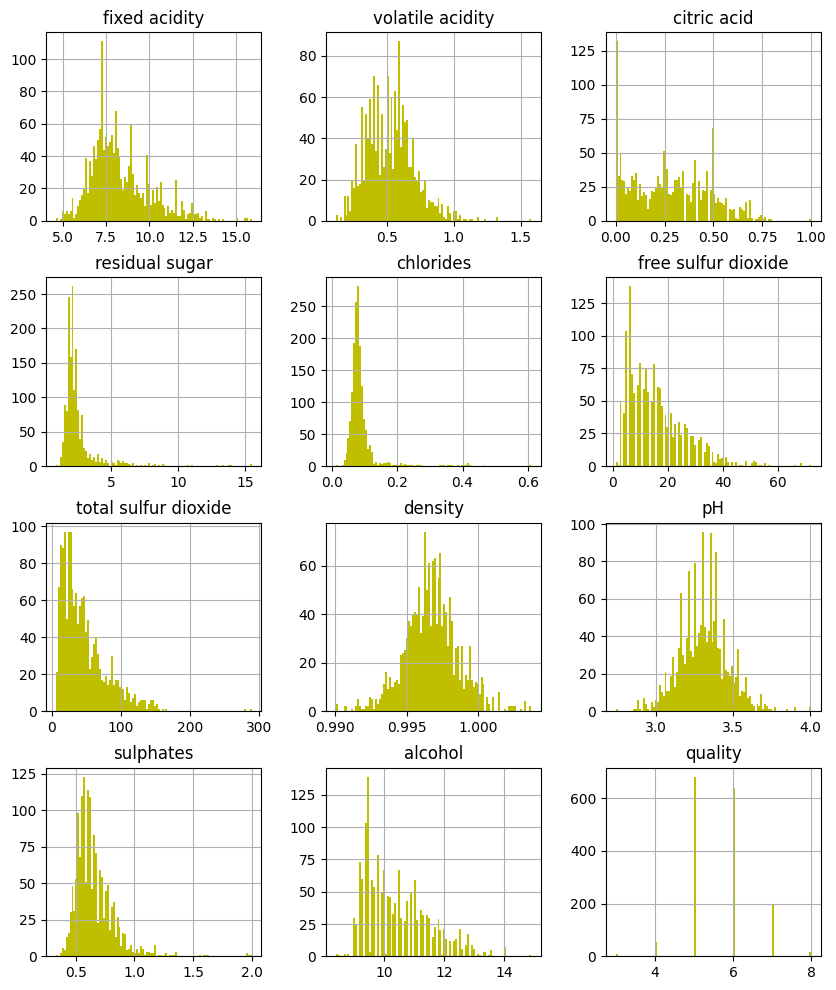

In [49]:
data.hist(bins=100, figsize=(10,12), color='y')
plt.show()

In [10]:
#count of each target variable
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<Axes: xlabel='quality', ylabel='count'>

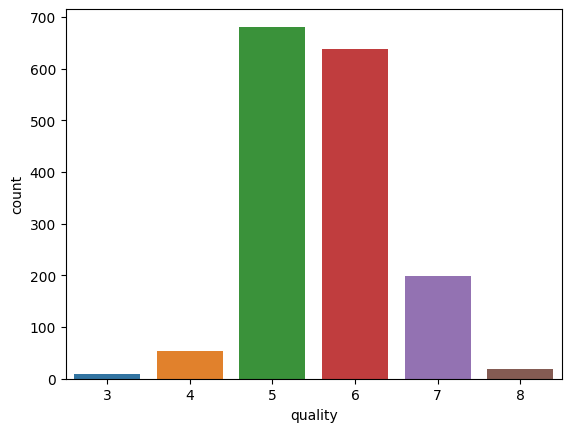

In [11]:
sns.countplot(x='quality', data=data)

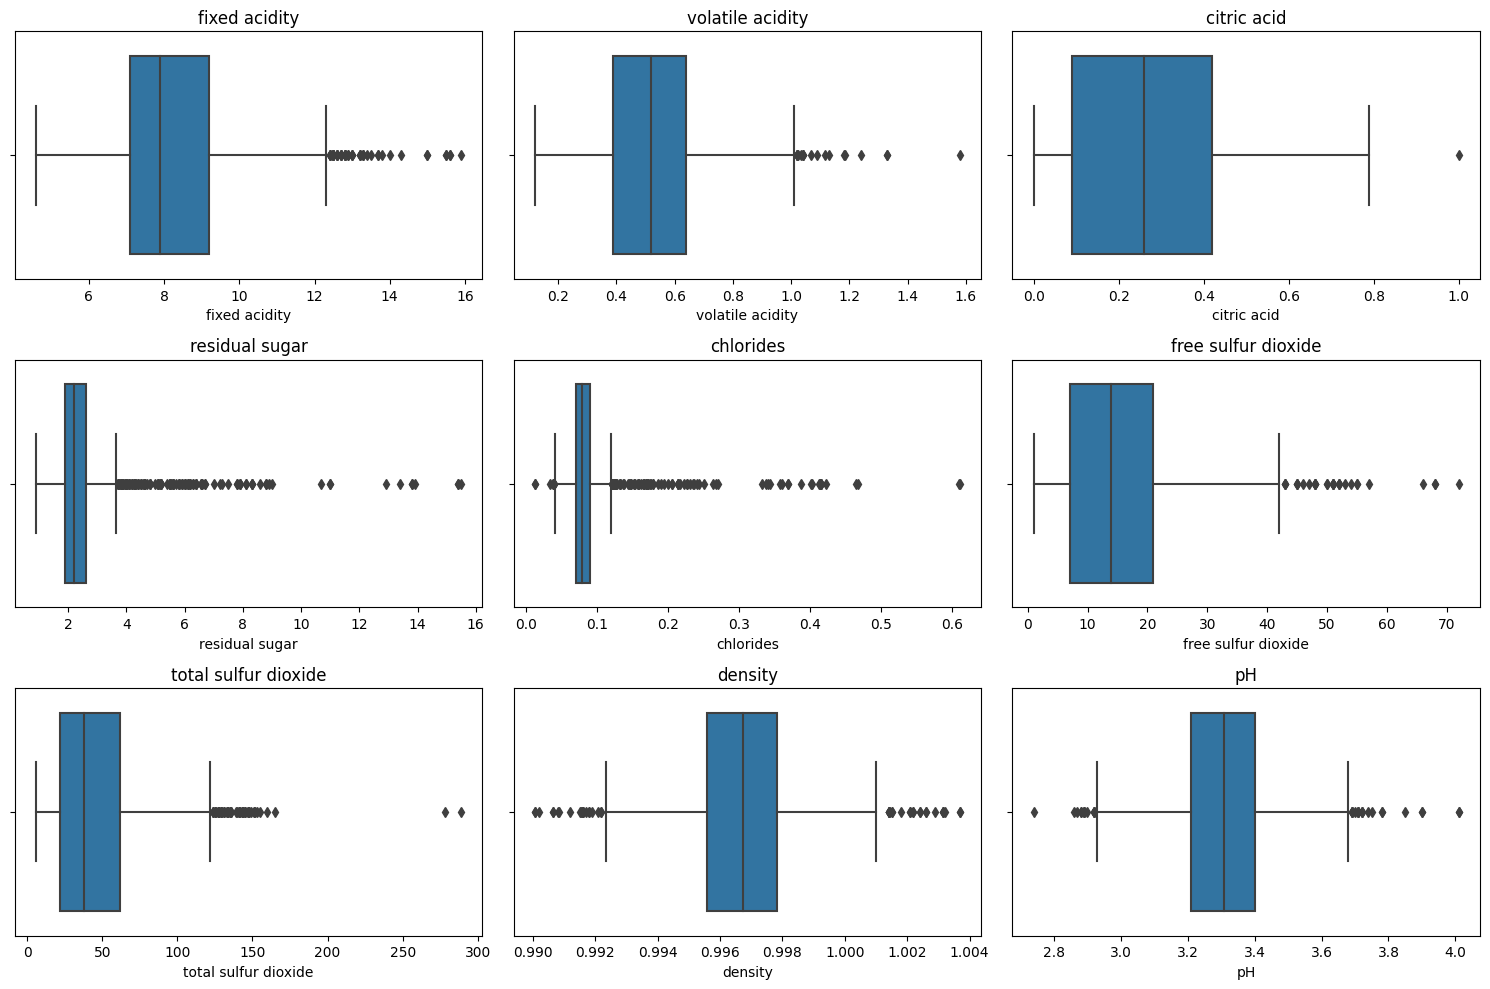

In [13]:
#outliers detection
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [14]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3.
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way.
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

The target variable 'review' in the red wine quality dataset is categorized into three classes:

Bad:

Includes wine reviews rated as 1, 2, and 3.
The classification reflects wines with lower perceived quality or those rated less favorably.

Average:

Comprises wine reviews rated as 4, 5, 6, and 7.
Represents wines with moderate or average quality, falling in the mid-range of perceived quality.

Excellent:

Encompasses wine reviews rated as 8, 9, and 10.
Indicates wines that are highly regarded or perceived as excellent in quality.

In [15]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [16]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [17]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [18]:
x = data.iloc[:,:11]
y = data['Reviews']

In [19]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [20]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Reviews, dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [31]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   3   0]
 [  3 386   2]
 [  0   6   0]]
96.5


In [28]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      0.99      0.98       391
           3       0.00      0.00      0.00         6

    accuracy                           0.96       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.96      0.96       400



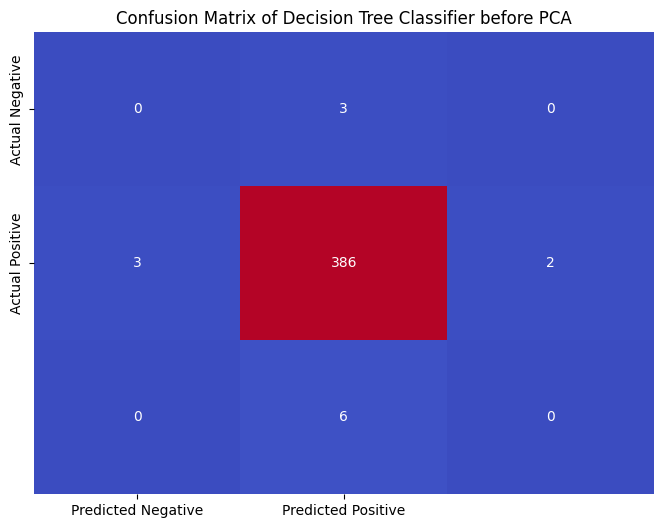

In [30]:
cm = confusion_matrix(y_true=y_test, y_pred=dt_predict)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix of Decision Tree Classifier before PCA')
plt.show()

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

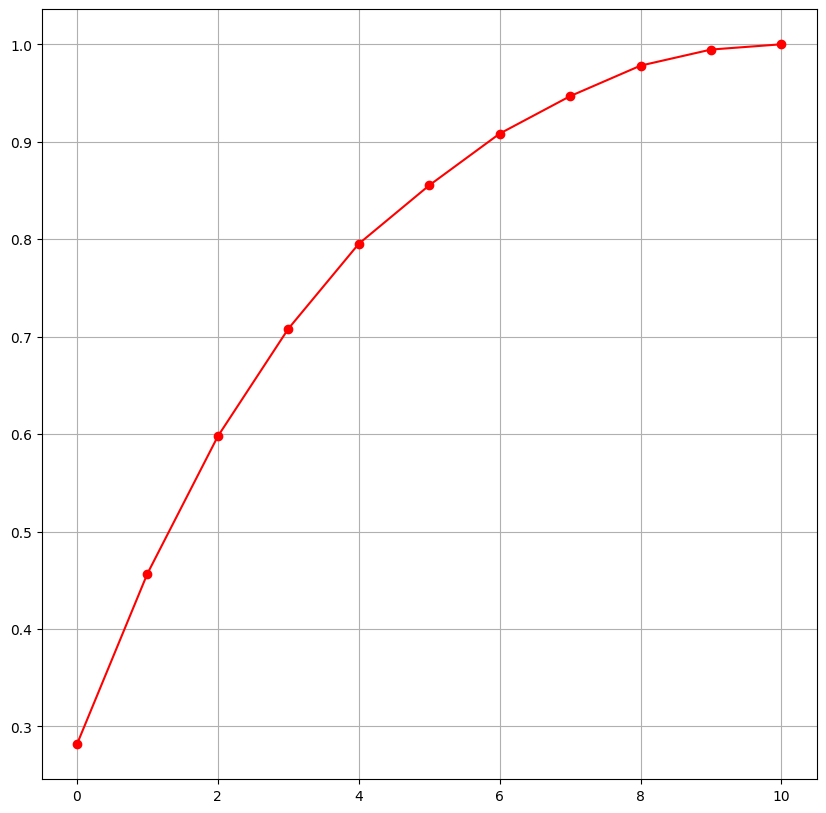

In [33]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [34]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data.
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [35]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [39]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  1   2   0]
 [  2 386   4]
 [  0   3   2]]
97.25


In [40]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.99      0.98      0.99       392
           3       0.33      0.40      0.36         5

    accuracy                           0.97       400
   macro avg       0.55      0.57      0.56       400
weighted avg       0.97      0.97      0.97       400



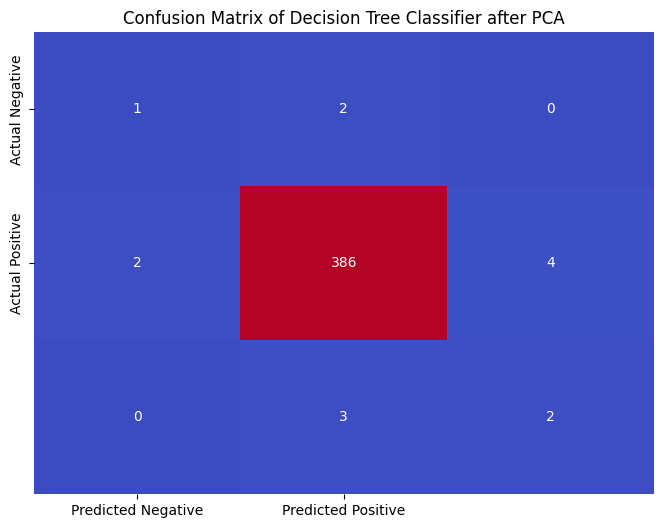

In [42]:
cm = confusion_matrix(y_true=y_test, y_pred=dt_predict)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix of Decision Tree Classifier after PCA')
plt.show()

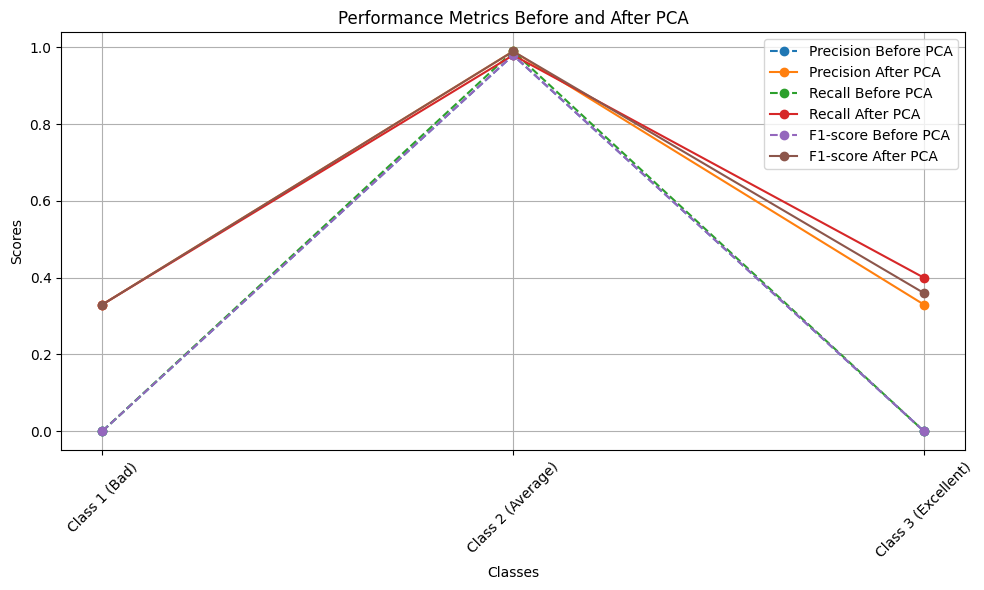

In [44]:
precision_before = [0.00, 0.98, 0.00]
recall_before = [0.00, 0.99, 0.00]
f1_score_before = [0.00, 0.98, 0.00]

# After PCA
precision_after = [0.33, 0.99, 0.33]
recall_after = [0.33, 0.98, 0.40]
f1_score_after = [0.33, 0.99, 0.36]

classes = ['Class 1 (Bad)', 'Class 2 (Average)', 'Class 3 (Excellent)']

plt.figure(figsize=(10, 6))

plt.plot(classes, precision_before, marker='o', label='Precision Before PCA', linestyle='--')
plt.plot(classes, precision_after, marker='o', label='Precision After PCA', linestyle='-')

plt.plot(classes, recall_before, marker='o', label='Recall Before PCA', linestyle='--')
plt.plot(classes, recall_after, marker='o', label='Recall After PCA', linestyle='-')

plt.plot(classes, f1_score_before, marker='o', label='F1-score Before PCA', linestyle='--')
plt.plot(classes, f1_score_after, marker='o', label='F1-score After PCA', linestyle='-')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Performance Metrics Before and After PCA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Interpretation:

You'll see lines representing precision, recall, and F1-score for each class.
The dashed lines represent scores before applying PCA, while solid lines represent scores after PCA.
Observing the lines will showcase the change in these metrics for each class.
This plot will help in visualizing the performance changes more distinctly for each class in terms of precision, recall, and F1-score before and after the PCA process followed by the decision tree classification.

Before PCA:

Class 1 (Bad): Precision, recall, and F1-score were extremely low (almost 0) indicating poor classification ability for this category.

Class 2 (Average): Showed high precision and recall (around 0.98-0.99) with a high F1-score (close to 0.98), indicating accurate and reliable classification.

Class 3 (Excellent): Precision and recall were both very low (almost 0), suggesting an inability to effectively classify this category.

After PCA:

Class 1 (Bad): Saw an increase in precision (from 0 to 0.33) but still had limited recall and F1-score.

Class 2 (Average): Maintained high precision and recall with a similar F1-score, indicating consistent and accurate classification.

Class 3 (Excellent): Showed improvements in precision and recall (from nearly 0 to 0.33 and 0.40, respectively), but the F1-score remained low.

Inference:

The model performed well in categorizing wines labeled as 'Average' both before and after applying PCA.
For 'Bad' wines, there was an improvement in precision after PCA, though the recall remained low, indicating a partial ability to identify these wines correctly.
However, the model struggled to classify 'Excellent' wines both before and after PCA, with low precision, recall, and F1-score, indicating significant difficulty in identifying this category accurately.
It's crucial to note that while the model showed improvements for certain categories (especially 'Bad' wines after PCA), it still had limitations, particularly in effectively classifying wines as 'Excellent.'